In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('student-por.csv')
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


### Question: How would you check for and handle missing values in this dataset?

In [8]:
## First : check for duplicate rows

In [9]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [10]:
## So we dont have duplicate rows

In [11]:
## Second : We check for nulls in the dataset

In [12]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
## So our data has no null values

In [14]:
## So we did the two checks , first is checking duplicates, then checking if there are any null values. We see there are no null values or duplicate rows, we are good to proceed

### Question: How would you check the data types of each column and identify whether any need transformation (e.g., categorical encoding, scaling)?

In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [25]:
## Looking into the columns one by one
## 1) school, sex, address, Pstatus, Mjob, Fjob, reason, schoolsup, famsup, paid, activities, nursery, internet, romantic  -> These are categorical columns, whose values are norminal (means no ranking is there). So we can pd.get_dummies and then do one hot encoding in it
## 2) famsize, Medu, Fedu -> These are categorical columns, whose values are ordinal (presense of ranking). So we can you LabelEncoding. Wont do one hot encoding to preserve the ordinal ranking.
## 3) Scaling I dont think will be required, as the numbers in score ranges in max 20. Even if we look at the other columns, does not cross that max mark

In [17]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [19]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [20]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [21]:
df['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

In [22]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [23]:
df['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [24]:
df['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

### Question: If you were asked to visualize the distribution of student scores (say, math, reading, and writing), what plots would you choose, and what insights would you expect to gain from them?

In [26]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

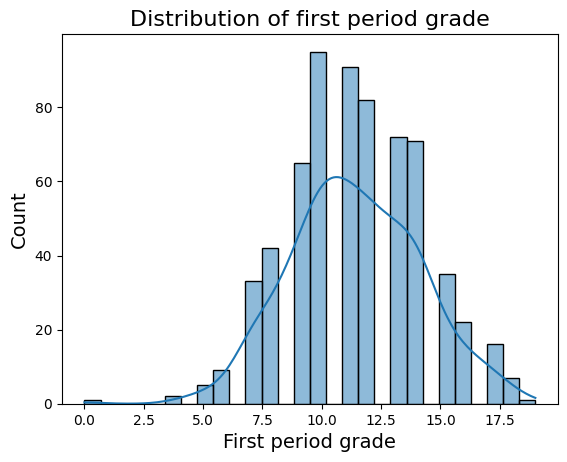

In [29]:
fig, ax = plt.subplots()
ax.set_title('Distribution of first period grade', fontsize = 16)
ax.set_xlabel('First period grade', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
sns.histplot(x = 'G1', data = df, kde = True)
plt.show()

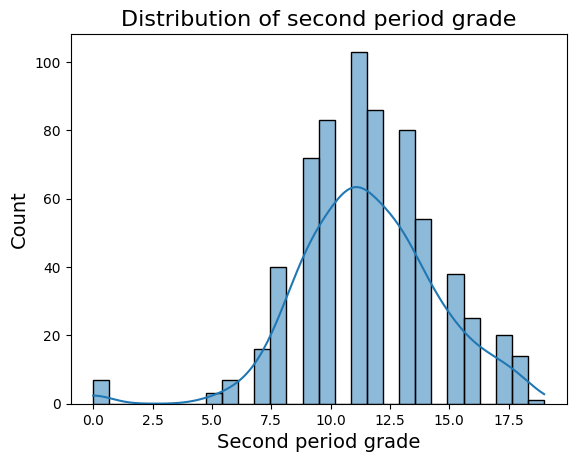

In [30]:
fig, ax = plt.subplots()
ax.set_title('Distribution of second period grade', fontsize = 16)
ax.set_xlabel('Second period grade', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
sns.histplot(x = 'G2', data = df, kde = True)
plt.show()

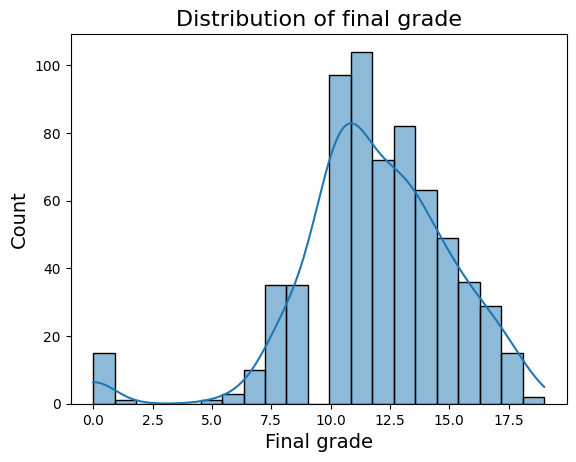

In [31]:
fig, ax = plt.subplots()
ax.set_title('Distribution of final grade', fontsize = 16)
ax.set_xlabel('Final grade', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
sns.histplot(x = 'G3', data = df, kde = True)
plt.show()

In [32]:
## From the three distributions, we see that in the first and second grade students mostly performed average, 
## but coming to final grade the students performance drastically improved

### Question: Suppose you want to analyze how study time and final grade (G3) are related. What visualization would you choose, and what kind of trend or pattern would you expect to see?

In [46]:
df['id'] = df.index
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,4


In [51]:
df_pivot = df.pivot_table(
                          index = 'studytime',
                          columns = 'G3',
                          values = 'id',
                          aggfunc = 'count',
                          fill_value = 0
                         )

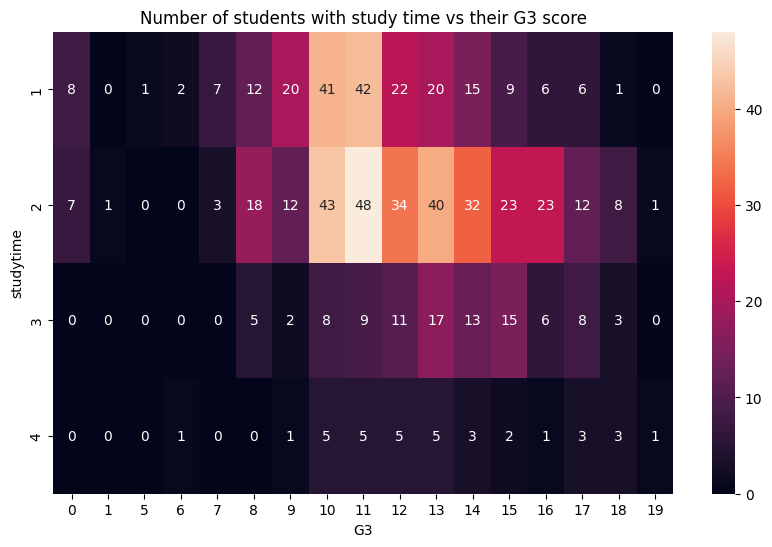

In [53]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Number of students with study time vs their G3 score')
sns.heatmap(df_pivot, annot = True)
plt.show()

In [54]:
## From the above graph, we see that with studytime of 2 , students peform the best. Followed by 1 and 3.
## We see that there are very less number of students with study time 4.
## Most students prefer studytime of 1 and 2, and they perform also very good in this time

### Question: Suppose you want to formally test whether study time has a statistically significant effect on final grade (G3). What statistical test would you choose, and why?

In [55]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,3
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,4


In [59]:
## I think we can go for regression test OLS , to see whether studytime has a significant effect on the final score, and get p value

In [57]:
## We can check correlation

In [58]:
df['studytime'].corr(df['G3'])

np.float64(0.24978868999886356)

In [61]:
## This shows that correlation is positive, but its 0.25 which is not very significant. 
## Guess we have to considers other features too which interpret the effect on the final score

### Question : If you were to build a linear regression model to predict final grade (G3), which features would you include, and why?

In [62]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1


In [63]:
df_numerical = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [65]:
df_corr = df_numerical.corr()

<Axes: >

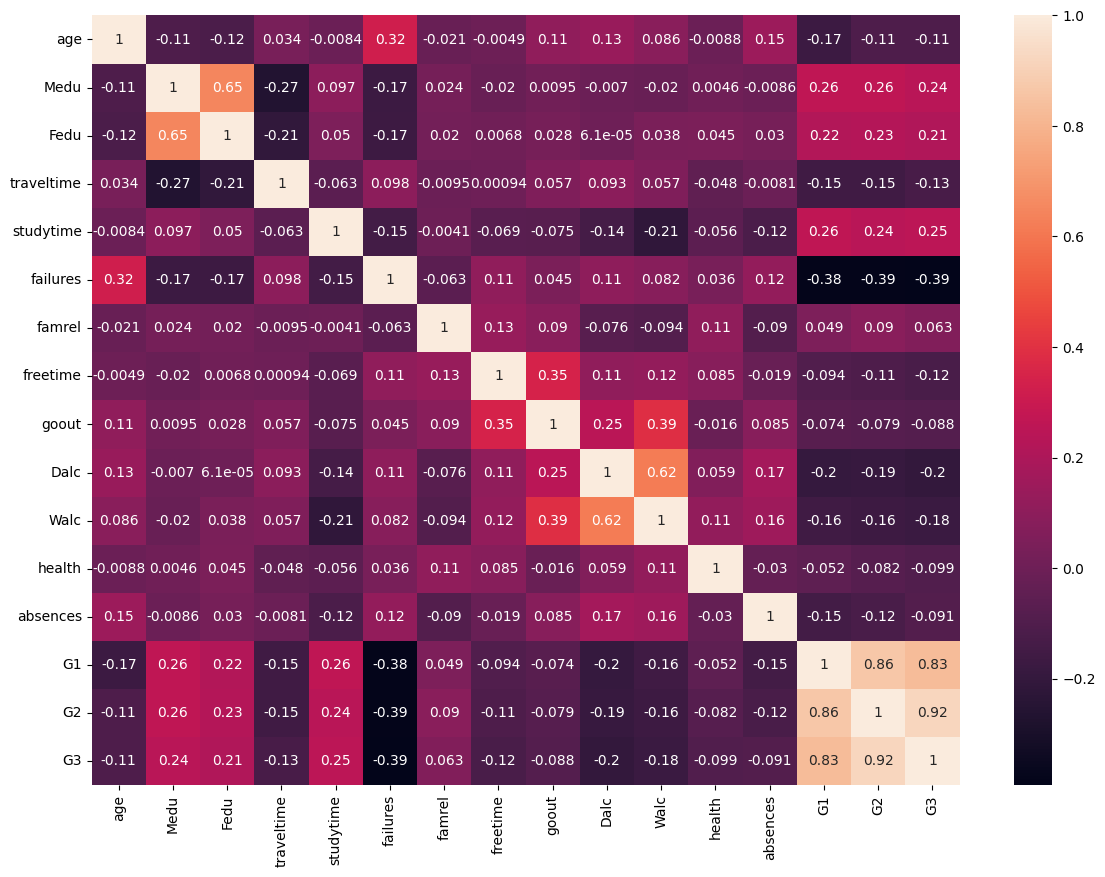

In [69]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_corr, annot = True)

In [70]:
## From the numerical columns we see, that G1 and G2 score directly impact the final score. We see a string positive correlation of 0.83 and 0.92
## We can consider Dalc , it has a negative impact on the final score . -0.2
## Failures we will consider, it has a negative impact on the final score. -0.39
## Studytime, somewhat positive not significanr. 0.25
## Also include Medu, Fedu it shows a positive correlation. 0.24 , 0.21

In [71]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1


In [78]:
df.groupby(['school', 'sex', 'higher', 'internet']).agg(average_final_score = ('G3', 'mean'))

average_final_score
school sex higher internet                     
GP     F   no     no                  11.000000
                  yes                  9.900000
           yes    no                  12.700000
                  yes                 13.259459
       M   no     no                   8.666667
                  yes                  8.470588
           yes    no                  11.681818
                  yes                 12.576389
MS     F   no     no                   8.142857
                  yes                  9.000000
           yes    no                  11.309524
                  yes                 11.617284
       M   no     no                  11.000000
                  yes                  8.000000
           yes    no                   9.200000
                  yes                 10.853659

In [79]:
### 'school', 'sex', 'higher', 'internet' -> These categorical values can have a significant impact on the G3 score. We can include these

### Question: If you were to fit a multiple linear regression model predicting G3, how would you handle the issue of multicollinearity given that G1 and G2 are highly correlated with G3 and with each other?

In [80]:
### From the above discussion, we selected from numerical columns -> G1, G2, Dalc, Failures, StudyTime, Medu, Fedu
## We selected from categorical columns -> school, sex, higher, internet

In [81]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1


In [82]:
## If we start from numerical columns, you see I have not included Walc, since the students who consumes daily will mostly consume weekly too. So have removed the Walc. It has a collinearity of 0.62 which is quite high.
## Also one thing I noticed is that Medu and Fedu too are high correlated. I think we can keep them, later use a L2 regularization to decrease the weights on these columns.
## For categorical columns we have kept the ones which can have impact on G3 score. Already removed the unnecessary ones like address and other stuffs

## Scaling and encoding features

In [88]:
### Encoding for the selected categorical columns

In [92]:
df_school_encoding = pd.get_dummies(df['school'], dtype = int, drop_first = True)

In [93]:
df_sex_encoding = pd.get_dummies(df['sex'], dtype = int, drop_first = True)

In [94]:
df_higher_encoding = pd.get_dummies(df['higher'], dtype = int, drop_first = True)

In [95]:
df_internet_encoding = pd.get_dummies(df['internet'], dtype = int, drop_first = True)

In [96]:
### Adding the selected numerical columns

In [97]:
df_numerical_modelling = df[['G1', 'G2', 'Dalc', 'failures', 'studytime', 'Medu', 'Fedu']]

In [98]:
X = pd.concat([df_numerical_modelling, df_school_encoding, df_sex_encoding, df_higher_encoding, df_internet_encoding], axis = 'columns')

In [100]:
y = df['G3']

In [101]:
## Next we do is scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
X_scaled = scaler.fit_transform(X)

In [107]:
### Check for multicollinearity using VIF before proceeding further

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [110]:
df_numerical.head(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11


In [111]:
df_numerical = add_constant(df_numerical)

In [117]:
df_vif = pd.DataFrame()

In [118]:
df_vif['features'] = df_numerical.columns

In [119]:
df_vif['VIF'] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]

In [120]:
df_vif

,features,VIF
0,const,293.117603
1,age,1.191692
2,Medu,1.832892
3,Fedu,1.771205
4,traveltime,1.106852
5,studytime,1.131189
6,failures,1.340462
7,famrel,1.079604
8,freetime,1.191249
9,goout,1.371589


In [121]:
## Since we were worried of the multicollinearity of G1 and G2, we see that they are 4.3 and 8.4 which is less than 10
## Also Medu, faedu too have low multicolinearity

In [122]:
### Finally, going to model selection

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Question: After fitting, how would you evaluate the model’s performance both on the training and test sets?

In [125]:
from sklearn import linear_model

In [126]:
model = linear_model.Ridge()

In [127]:
model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [129]:
y_pred = model.predict(X_test)

In [136]:
model.score(X_train, y_train)

0.866856040211619

In [135]:
model.score(X_test, y_test)

0.782303687437528

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [132]:
import numpy as np

In [134]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  1.4459506975910483


In [137]:
print('MAE: ', mean_absolute_error(y_test, y_pred))

MAE:  0.8998643578289999


In [138]:
print('r2_score: ', r2_score(y_test, y_pred))

r2_score:  0.782303687437528


In [139]:
## We see that the model score for the training set is 86.7 % approx, which is good percentage. We can assume that the model is not overly fitted. hence , we see low variance, r2_score : 0.78
## model score is 78.23% which is not that bad